# 1

In [ ]:
import pandas as pd
import sqlite3
import pyarrow.feather as feather

feather_file_path = 'first_question_data.feather'  
data_frame = feather.read_feather(feather_file_path)


db_path = 'database.db'  
table_name = 'customers'     

conn = sqlite3.connect(db_path)

data_frame.to_sql(table_name, conn, if_exists='replace', index=False)

conn.commit()
conn.close()

print(f"Data from '{feather_file_path}' has been successfully imported into '{table_name}' in '{db_path}'.")


Data from 'first_question_data.feather' has been successfully imported into 'customers' in 'database.db'.


In [ ]:
import pandas as pd
import sqlite3

db_path = 'database.db'  
conn = sqlite3.connect(db_path)

query = 'SELECT * FROM customers'  
query_result = pd.read_sql(query, conn)

query_result

,id,customer_id,amount,sales_date_id
0,3545,315,1197.831736,20221001
1,14990,429,6243.258719,20221001
2,20160,712,3591.662007,20221001
3,28355,547,1018.891899,20221001
4,10537,472,2156.703051,20221001
...,...,...,...,...
29995,15824,519,3897.570403,20230331
29996,7524,267,1644.044098,20230331
29997,29515,609,1418.977691,20230331
29998,15808,357,6513.137164,20230331


In [ ]:
query = '''SELECT
    count(distinct id) as sales_count,
    count(distinct customer_id) as customer_count,
    sum(amount) as total_amount_sumation,
    DATE(
        substr(sales_date_id, 1, 4) || "-" || substr(sales_date_id, 5, 2) || "-" || substr(sales_date_id, 7, 2)
    ) AS sales_date
FROM
    customers
group by
    4'''

query_result = pd.read_sql(query, conn)

query_result

,sales_count,customer_count,total_amount_sumation,sales_date
0,175,162,6.242696e+05,2022-10-01
1,162,151,5.592892e+05,2022-10-02
2,156,144,5.490152e+05,2022-10-03
3,157,132,5.502939e+05,2022-10-04
4,147,139,5.080494e+05,2022-10-05
...,...,...,...,...
177,175,162,9.138054e+05,2023-03-27
178,154,133,7.858207e+05,2023-03-28
179,179,158,9.542138e+05,2023-03-29
180,168,157,8.728594e+05,2023-03-30


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Create a subplot with two y-axes
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces for sales count and customer count
fig.add_trace(
    go.Scatter(x=query_result['sales_date'], y=query_result['sales_count'], name="Sales Count"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=query_result['sales_date'], y=query_result['customer_count'], name="Customer Count"),
    secondary_y=False,
)

# Add trace for total amount summation
fig.add_trace(
    go.Scatter(x=query_result['sales_date'], y=query_result['total_amount_sumation'], name="Total Amount Sum"),
    secondary_y=True,
)

fig.update_layout(title_text="Sales Metrics Over Time with Two Y-Axes")
fig.update_xaxes(title_text='Sales Date')

fig.update_yaxes(title_text="Counts", secondary_y=False)
fig.update_yaxes(title_text="Total Amount Sum", secondary_y=True)

fig.show()

In [ ]:
query_result


,sales_count,customer_count,total_amount_sumation,sales_date
0,175,162,6.242696e+05,2022-10-01
1,162,151,5.592892e+05,2022-10-02
2,156,144,5.490152e+05,2022-10-03
3,157,132,5.502939e+05,2022-10-04
4,147,139,5.080494e+05,2022-10-05
...,...,...,...,...
177,175,162,9.138054e+05,2023-03-27
178,154,133,7.858207e+05,2023-03-28
179,179,158,9.542138e+05,2023-03-29
180,168,157,8.728594e+05,2023-03-30


<ipython-input-5-3c44b62f4b63>:37: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



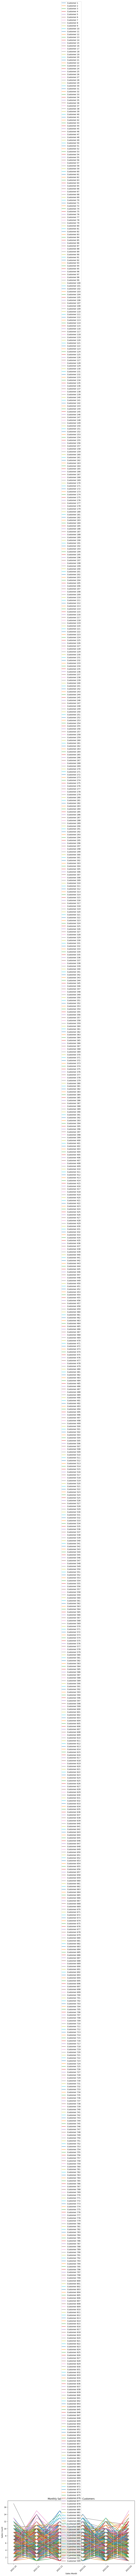

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

db_path = 'database.db'  
conn = sqlite3.connect(db_path)

query = '''SELECT
    strftime('%Y-%m', DATE(
        substr(sales_date_id, 1, 4) || "-" || substr(sales_date_id, 5, 2) || "-" || substr(sales_date_id, 7, 2))
    ) AS sales_month,
    customer_id,
    count(id) as sales_count,
    sum(amount) as total_amount
FROM
    customers
GROUP BY
    1, 2'''
query_result = pd.read_sql(query, conn)

conn.close()

plt.figure(figsize=(12, 6))
for customer_id in query_result['customer_id'].unique():
    customer_data = query_result[query_result['customer_id'] == customer_id]
    plt.plot(customer_data['sales_month'], customer_data['sales_count'], label=f'Customer {customer_id}')

plt.xlabel('Sales Month')
plt.ylabel('Sales Count')
plt.title('Monthly Sales Comparison for Customers')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
D - 1

select 
	month(cast(cast(sales_date_id as char(8)) as date)) as [Month]
	,count(id) as [TotalQty]
	,cast(sum(amount) as decimal(18,2)) as [TotalAmount]
from 
	customer_sales_detail
group by
	month(cast(cast(sales_date_id as char(8)) as date))



D - 2

select
	customer_id
from
	(
	select 
		month(cast(cast(sales_date_id as char(8)) as date)) as [Month]
		,count(id) as [TotalQty]
		,customer_id
	from 
		customer_sales_detail
	group by
		month(cast(cast(sales_date_id as char(8)) as date)), customer_id
	) as z
where z.TotalQty > 100



D - 3

select
	customer_id
from
	(
	select 
		month(cast(cast(sales_date_id as char(8)) as date)) as [Month]
		,count(id) as [TotalQty]
		,cast(sum(amount) as decimal(18,2)) as [TotalAmount]
		,customer_id
	from 
		customer_sales_detail
	group by
		month(cast(cast(sales_date_id as char(8)) as date)), customer_id
	) as z
where z.TotalQty > 100
	  and z.TotalAmount > 20000

# 3

In [ ]:
select 
	sum(s.sales_amount * com.commission_rate)
from 
	sales as s 
inner join 
	products as p on s.product_id = p.product_id
inner join 
	categories as c on p.category_id = c.category_id
inner join 
	commissions as com on com.product_id = p.product_id 
	and com.category_id = c.category_id 
	and com.period_ = left(convert(varchar,s.sales_datetime,102),4) + '-' + substring(convert(varchar,s.sales_datetime,102),6,2)
where 
	cast(s.sales_datetime as date) between '20220101' and '20221231'

# 2

Düşünelim ki dümdüz stabil giden bir time series grafiğimiz var. Ama birden ani bir artış/azalış yaşanıyor. Amacımız bunun nedenini tespit etmek. Burada ilk bakacağım şey  geçmiş dataya bakarak bir önceki saate göre yüzdelik değişimi tahmin etmeye çalışmak olurdu. Yani geçmiş datada belirli frekanslar tutabilir, örneğin saat bilgisi gibi belirli saatlerde satışlar fırlıyor olabilir ya da dolar arttı diyelim satışlar düşüyor olabilir. 

Modelleme hangi problemlere benzetilebilir---> Yaklaşıma göre değişir. Örneğin bu bir time series ise regresyon problemidir. Öncelikle dataya bir bakarız outlier tanımı ne olabilir diye. Mesela % 40 üzerini otlier olarak alalım. Sonra bunları 0-0-0-1-0-1 gibi targetlarım. Böylece binary classification olur. 

Bu modeli canlıya aldığımızda başarı kritileri bizim için ne olurdu----> regression için MAPE olabilir, classification için F1. 

Canlıda böyle bir modeli nasıl çalıştırabilirdik------> api yazardım, ya da batch işlem olarak airflowda çalıştırırdım.